Import all the needed libraries.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import json
plt.style.use('../presentation.mplstyle')

Variables for running the notebook.

In [16]:
METRIC="accuracy"
DATASET="ICS-D1"
GREEDY_STRATEGY="sequential_backward_elimination"
EVALUATION_ALGORITHM="custom"
REMAINING_APPROACH="random"
PRUNING_ALGORITHM="locally_neurons_l1"
PRUNE_AMOUNT=[]

SUBSETS_SIZE_AMOUNTS=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
BEST_FEATURES_FOR_SUBSET_AMOUNTS=[0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00]
MODEL_PRUNING_AMOUNTS=[0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00]

AUTOML_DIRECTORY=f"../datasets/{DATASET}/balanced/automl_search"
BEST_MODEL_DIRECTORY=f"{AUTOML_DIRECTORY}/models/best_model"
GREEDY_RANK_DIRECTORY=f"{BEST_MODEL_DIRECTORY}/feature_ranking_{GREEDY_STRATEGY}_{EVALUATION_ALGORITHM}"
FEATURE_SUBSETS_DIRECTORY=f"{GREEDY_RANK_DIRECTORY}/feature_subset_stochastic_search_{REMAINING_APPROACH}"
PRUNED_MODELS_DIRECTORY=f"{BEST_MODEL_DIRECTORY}/prune_search/{PRUNING_ALGORITHM}"

In [3]:
"""
final = pd.DataFrame()
for dataset in ["EDGE2022", "CICIDS2017", "ICS-D1"]:
    for pruning in ["locally_neurons_l1", "locally_connections_l1", "globally_connections_l1", "globally_connections_random"]:
        df = pd.DataFrame()
        for x in SUBSETS_SIZE_AMOUNTS:
            tmp = pd.read_csv(f"../datasets/{dataset}/balanced/automl_search/models/best_model/feature_ranking_{GREEDY_STRATEGY}_{EVALUATION_ALGORITHM}/feature_subset_stochastic_search_{REMAINING_APPROACH}/feature_subsets_{x:.2f}s/leaderboard_{pruning}.csv", index_col="ID")
            tmp = tmp.iloc[:1]
            tmp['kind'] = f"{x:.2f}"
            tmp['dataset'] = dataset
            tmp['algorithm'] = "".join([x[0] if len(x) > 2 else x for x in pruning.split("_")]).upper()
            df = pd.concat((df, tmp))
        df.sort_values('kind', inplace=True, ascending=False)
        models_stats = pd.read_csv(f"../datasets/{dataset}/balanced/automl_search/models/best_model/prune_search/{pruning}/models_stats.csv", index_col="ID")
        score_with_pruning_amounts = df.join(models_stats, on="model_ID", how='left')
        if "locally_" in pruning:
            import ast
            score_with_pruning_amounts["amount"] = score_with_pruning_amounts["amount"].apply(lambda x: round(sum(x for x in ast.literal_eval(x))/len(ast.literal_eval(x)), 2))
        
        final = pd.concat((final, score_with_pruning_amounts))
minimums_baseline = final.groupby(["dataset", "kind", "algorithm"]).agg({'degradation_full_baseline':'first', "degradation_at_rank": "first", "degradation_at_subset": "first", "amount": "first"})
minimums_baseline.rename(columns={"degradation_full_baseline": "D Baseline", "degradation_at_subset": "D SS", "degradation_at_rank": "D RFE", "amount": "Pruning ratio"}, inplace=True)
with open("asd.txt", "w") as fp:
    fp.write(minimums_baseline.to_latex())
"""

'\nfinal = pd.DataFrame()\nfor dataset in ["EDGE2022", "CICIDS2017", "ICS-D1"]:\n    for pruning in ["locally_neurons_l1", "locally_connections_l1", "globally_connections_l1", "globally_connections_random"]:\n        df = pd.DataFrame()\n        for x in SUBSETS_SIZE_AMOUNTS:\n            tmp = pd.read_csv(f"../datasets/{dataset}/balanced/automl_search/models/best_model/feature_ranking_{GREEDY_STRATEGY}_{EVALUATION_ALGORITHM}/feature_subset_stochastic_search_{REMAINING_APPROACH}/feature_subsets_{x:.2f}s/leaderboard_{pruning}.csv", index_col="ID")\n            tmp = tmp.iloc[:1]\n            tmp[\'kind\'] = f"{x:.2f}"\n            tmp[\'dataset\'] = dataset\n            tmp[\'algorithm\'] = "".join([x[0] if len(x) > 2 else x for x in pruning.split("_")]).upper()\n            df = pd.concat((df, tmp))\n        df.sort_values(\'kind\', inplace=True, ascending=False)\n        models_stats = pd.read_csv(f"../datasets/{dataset}/balanced/automl_search/models/best_model/prune_search/{pruning}/

In [5]:

"""
DATASETS_IN_TABULAR = ["EDGE2022", "ICS-D1", "CICIDS2017"]

df = pd.DataFrame(columns=["Val Accuracy", "Finetune Accuracy", "Samples per second", "Model size", "# Features", "# Layers", "# Neurons", "Dropout", "Activation", "Batch norm"], index=pd.Index([], name="Dataset"))
for x in DATASETS_IN_TABULAR:
    samples = len(pd.read_csv(f"../datasets/{x}/balanced/validation.csv"))
    
    with open(f"../datasets/{x}/balanced/automl_search/models/best_model/info.json") as fp:
        tmp = json.load(fp)
    res_test = pd.read_csv(f"../datasets/{x}/balanced/automl_search/models/best_model/leaderboard.csv", index_col="ID").loc["finetune"][METRIC]

    df.loc[x] = [round(tmp["val_score"], 4), round(res_test, 4), round(samples/tmp["predict_time"]), tmp["memory_size"], tmp["num_features"],
                       tmp["hyperparameters"]["num_layers"], tmp["hyperparameters"]["hidden_size"],
                       round(tmp["hyperparameters"]["dropout_prob"], 4), tmp["hyperparameters"]["activation"],
                       tmp["hyperparameters"]["use_batchnorm"]]
print(df.to_latex())
"""

'\nDATASETS_IN_TABULAR = ["EDGE2022", "ICS-D1", "CICIDS2017"]\n\ndf = pd.DataFrame(columns=["Val Accuracy", "Finetune Accuracy", "Samples per second", "Model size", "# Features", "# Layers", "# Neurons", "Dropout", "Activation", "Batch norm"], index=pd.Index([], name="Dataset"))\nfor x in DATASETS_IN_TABULAR:\n    samples = len(pd.read_csv(f"../datasets/{x}/balanced/validation.csv"))\n    \n    with open(f"../datasets/{x}/balanced/automl_search/models/best_model/info.json") as fp:\n        tmp = json.load(fp)\n    res_test = pd.read_csv(f"../datasets/{x}/balanced/automl_search/models/best_model/leaderboard.csv", index_col="ID").loc["finetune"][METRIC]\n\n    df.loc[x] = [round(tmp["val_score"], 4), round(res_test, 4), round(samples/tmp["predict_time"]), tmp["memory_size"], tmp["num_features"],\n                       tmp["hyperparameters"]["num_layers"], tmp["hyperparameters"]["hidden_size"],\n                       round(tmp["hyperparameters"]["dropout_prob"], 4), tmp["hyperparameters

In [18]:
baseline = pd.read_csv(f"{BEST_MODEL_DIRECTORY}/leaderboard.csv", index_col="ID")
baseline_general = baseline.loc["finetune"][METRIC]
greedy = pd.read_csv(f"{GREEDY_RANK_DIRECTORY}/leaderboard.csv", index_col="ID")
max_features = greedy.index.values[0]
baselines_at_ranks = [greedy.loc[round(k*max_features) or 1][METRIC] for k in SUBSETS_SIZE_AMOUNTS]

Chart #1: creating the feature ranking chart obtained via the RFE (Greedy) approach.

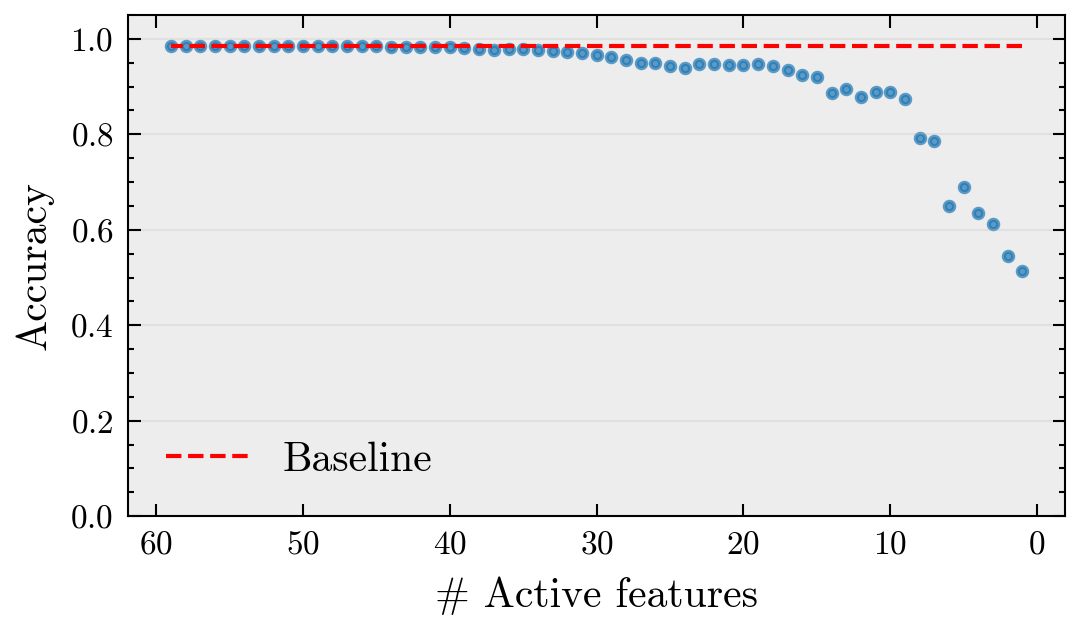

In [7]:
df = pd.read_csv(
    f"{GREEDY_RANK_DIRECTORY}/leaderboard.csv",
    index_col="ID")
df["ID"] = df.index.values
fig, ax = plt.subplots(figsize=(3.8, 2.3))
df.plot.scatter(x="ID",y=METRIC, ax=ax, alpha=0.7, s=5)
ax.invert_xaxis()
ax.set_ylim(0, 1.05)
ax.hlines(y = baseline_general, xmin=df.ID.min(), xmax=df.ID.max(), color = 'r', linestyle = '--', label="Baseline")
ax.set_ylabel(METRIC.capitalize())
ax.set_xlabel('# Active features')
ax.grid(axis="y")
ax.legend(loc="lower left")
fig.tight_layout()
fig.savefig(f"{GREEDY_RANK_DIRECTORY}/leaderboard_{METRIC}.pdf")

Chart #2: Creating the leaderboard of the subsets measured on the baseline model (no pruning yet)

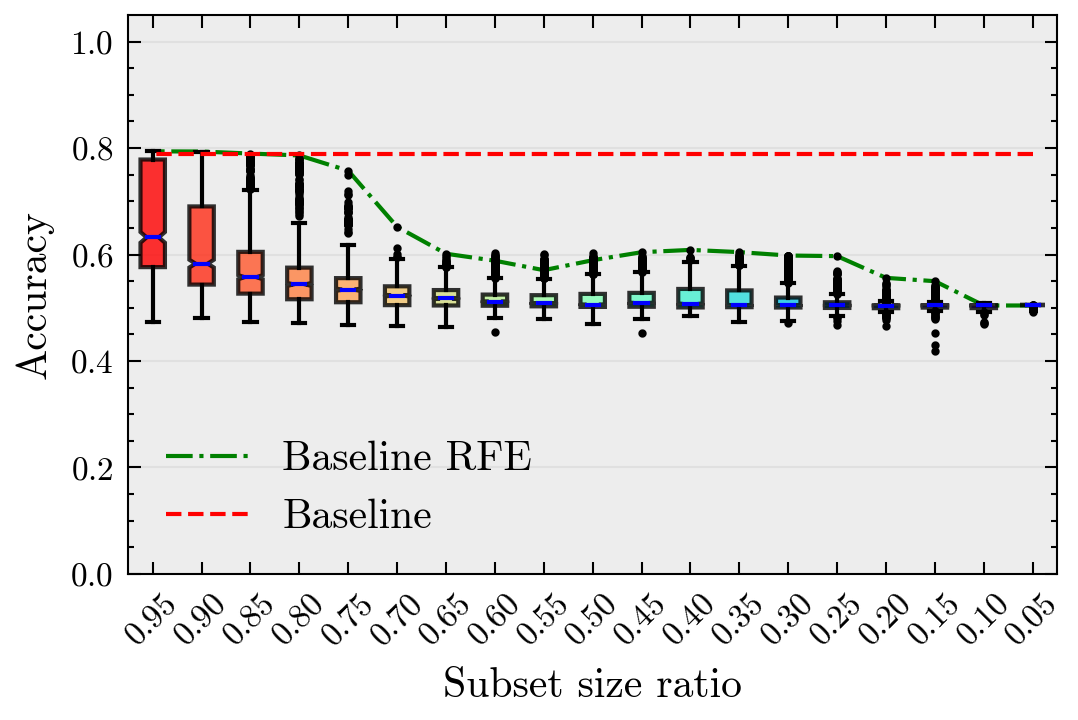

In [19]:
df = pd.DataFrame()
for x in SUBSETS_SIZE_AMOUNTS:
    tmp = pd.read_csv(f"{FEATURE_SUBSETS_DIRECTORY}/feature_subsets_{x:.2f}s/leaderboard.csv", index_col="ID")
    tmp.loc[len(tmp)] = greedy.loc[round(x*max_features) or 1]
    tmp['kind'] = f"{x:.2f}"
    df = pd.concat((df, tmp))

df.sort_values('kind', inplace=True, ascending=False)

cmap = cm.get_cmap('rainbow', len(df.kind.unique()))
fig, ax = plt.subplots()

ax.plot(range(1, 1+ len(df.kind.unique())), baselines_at_ranks, color='g', linestyle = '-.', label="Baseline RFE")

bp = df.plot.box(column=METRIC, by="kind", patch_artist=True, notch=True, ax=ax, return_type='both',
                 whiskerprops={"color": "black"}, capprops={"color": "black"}, medianprops={"color": "blue"})

[box.set(color="black", facecolor = cmap(i), alpha=0.8) for _, (__,row) in bp.items() for i, box in enumerate(row['boxes'])]

ax.invert_xaxis()
ax.set_ylim(0, 1.05)
ax.set_ylabel(METRIC.capitalize())
ax.set_xlabel('Subset size ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.grid(axis="y")
ax.hlines(y = baseline_general, xmin=1, xmax=len(df.kind.unique()), color = 'r', linestyle = '--', label="Baseline")
ax.legend(loc="lower left")
ax.set_title("")
fig.tight_layout()
fig.savefig(f"{FEATURE_SUBSETS_DIRECTORY}/leaderboard_{METRIC}.pdf")

## Leaderboard per pruning algorithm nel subset

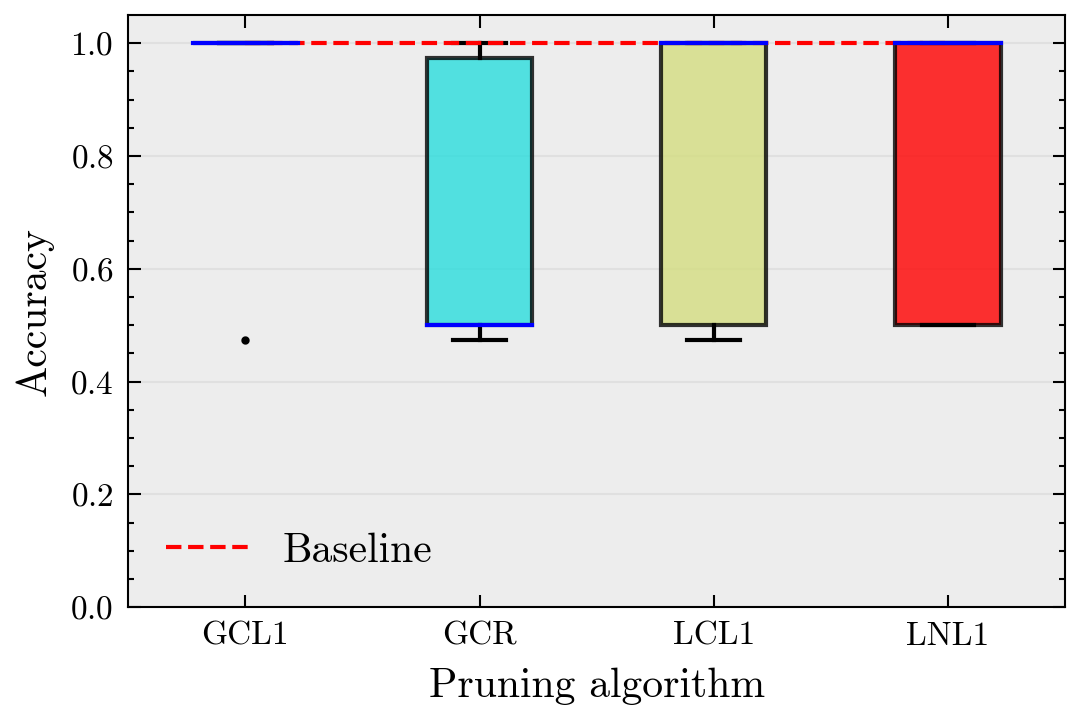

In [140]:
ALL_PRUNE_ALG = ["globally_connections_l1", "globally_connections_random", "locally_connections_l1", "locally_neurons_l1"]
df = pd.DataFrame()
for x in ALL_PRUNE_ALG:
    tmp = pd.read_csv(f"{BEST_MODEL_DIRECTORY}/prune_search/{x}/leaderboard.csv", index_col="ID")
    tmp['kind'] = "".join([x[0] if len(x) > 2 else x for x in x.split("_")]).upper()
    df = pd.concat((df, tmp))
df.sort_values('kind', inplace=True, ascending=False)
kinds = df.kind.unique()
cmap = cm.get_cmap('rainbow', len(df.kind.unique()))

fig, ax = plt.subplots()
bp = df.plot.box(column=METRIC, by="kind", patch_artist=True, ax=ax, return_type='both',
                 whiskerprops={"color": "black"}, capprops={"color": "black"}, medianprops={"color": "blue"})
[box.set(color='black', facecolor = cmap(i), alpha=0.8) for _, (__,row) in bp.items() for i, box in enumerate(row['boxes'])]

ax.set_ylim(0, 1.05)
ax.set_ylabel(METRIC.capitalize())
ax.set_xlabel('Pruning algorithm')
ax.grid(axis="y")
ax.hlines(y = baseline_general, xmin=1, xmax=len(df.kind.unique()), color = 'r', linestyle = '--', label="Baseline")
ax.legend(loc="lower left")
ax.set_title("")
fig.tight_layout()
fig.savefig(f"{BEST_MODEL_DIRECTORY}/prune_search/pruning_algorithms.pdf")


In [151]:
df = pd.DataFrame()
for x in SUBSETS_SIZE_AMOUNTS:
    tmp = pd.read_csv(f"{FEATURE_SUBSETS_DIRECTORY}/feature_subsets_{x:.2f}s/leaderboard_{PRUNING_ALGORITHM}.csv", index_col="ID")
    tmp['kind'] = f"{x:.2f}"
    df = pd.concat((df, tmp))
df.sort_values('kind', inplace=True, ascending=False)
kinds = df.kind.unique()

models_stats = pd.read_csv(f"{PRUNED_MODELS_DIRECTORY}/models_stats.csv", index_col="ID")
score_with_pruning_amounts = df.join(models_stats, on="model_ID", how='left')
if "locally_" in PRUNING_ALGORITHM:
    import ast
    score_with_pruning_amounts["amount"] = score_with_pruning_amounts["amount"].apply(lambda x: round(sum(x for x in ast.literal_eval(x))/len(ast.literal_eval(x)), 2))

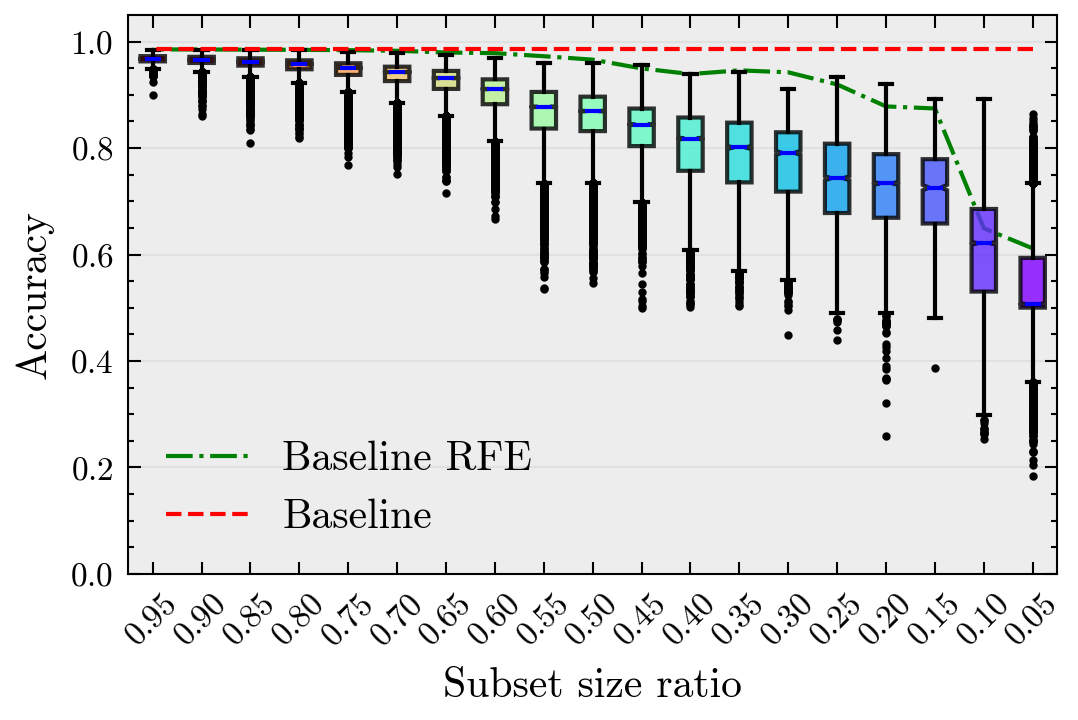

In [152]:
cmap = cm.get_cmap('rainbow', len(df.kind.unique()))
fig, ax = plt.subplots()

ax.plot(range(1, 1+ len(df.kind.unique())), baselines_at_ranks, color='g', linestyle = '-.', label="Baseline RFE")

bp = df.plot.box(column=METRIC, by="kind", patch_artist=True, notch=True, ax=ax, return_type='both',
                 whiskerprops={"color": "black"}, capprops={"color": "black"}, medianprops={"color": "blue"})
[box.set(color='black', facecolor = cmap(i), alpha=0.8) for _, (__,row) in bp.items() for i, box in enumerate(row['boxes'])]

ax.invert_xaxis()
ax.set_ylim(0, 1.05)
ax.set_ylabel(METRIC.capitalize())
ax.set_xlabel('Subset size ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.grid(axis="y")
ax.set_title("")
ax.hlines(y = baseline_general, xmin=1, xmax=len(df.kind.unique()), color = 'r', linestyle = '--', label="Baseline")
ax.legend(loc="lower left")
fig.tight_layout()
fig.savefig(f"{FEATURE_SUBSETS_DIRECTORY}/leaderboard_{METRIC}_{PRUNING_ALGORITHM}.pdf")

In [153]:
"""
dff = score_with_pruning_amounts.copy(deep=True)
minimums_baseline = dff[dff["degradation_full_baseline"] <= 0.10].groupby("kind").agg({'degradation_full_baseline':'min', "amount":'max'})[['degradation_full_baseline',"amount"]]
minimums_baseline.rename(columns={"degradation_full_baseline": "D baseline", "amount": "Pruning ratio"}, inplace=True)
minimums_rank = dff[dff["degradation_at_rank"] <= 0.10].groupby("kind").agg({'degradation_at_rank':'min', "amount":'max'})[['degradation_at_rank',"amount"]]
minimums_rank.rename(columns={"degradation_at_rank": "D RFE", "amount": "Pruning ratio "}, inplace=True)
tmp = pd.concat((minimums_baseline, minimums_rank), axis=1).sort_index(ascending=False)
print(tmp.to_latex())
"""

\begin{tabular}{lrrrr}
\toprule
{} &  D baseline &  Pruning ratio &     D RFE &  Pruning ratio  \\
kind &             &                &           &                 \\
\midrule
0.95 &    0.000437 &           0.32 &  0.000443 &            0.32 \\
0.90 &    0.000632 &           0.32 &  0.000571 &            0.32 \\
0.85 &    0.001209 &           0.32 &  0.000711 &            0.32 \\
0.80 &    0.001586 &           0.32 &  0.000827 &            0.32 \\
0.75 &    0.005291 &           0.32 &  0.003875 &            0.32 \\
0.70 &    0.006093 &           0.32 &  0.003545 &            0.32 \\
0.65 &    0.011123 &           0.32 &  0.005328 &            0.32 \\
0.60 &    0.016906 &           0.32 &  0.009851 &            0.32 \\
0.55 &    0.026735 &           0.32 &  0.013952 &            0.32 \\
0.50 &    0.026316 &           0.32 &  0.006995 &            0.32 \\
0.45 &    0.029748 &           0.32 & -0.006706 &            0.32 \\
0.40 &    0.046642 &           0.30 & -0.000357 &            0.3

/tmp/ipykernel_163191/200612132.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp.to_latex())


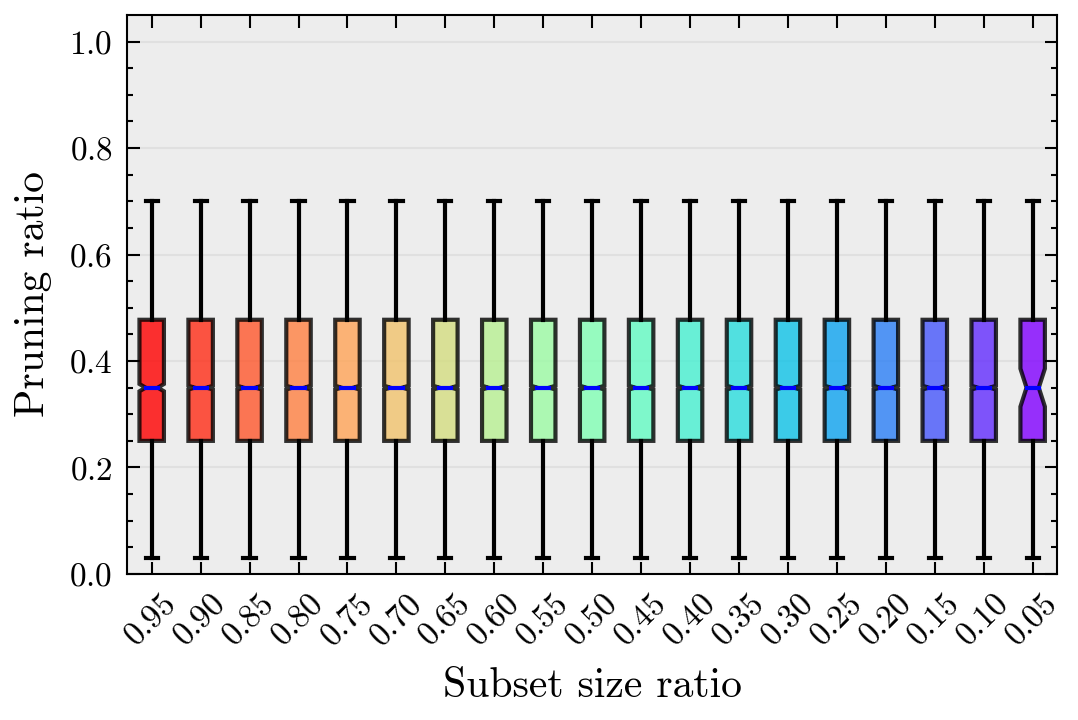

In [144]:
dff = score_with_pruning_amounts.copy(deep=True)
dff.loc[dff["degradation_full_baseline"] > 0.10, "amount"] = None
fig, ax = plt.subplots()
bp = dff.plot.box(column="amount", by="kind", patch_artist=True, notch=True, ax=ax, return_type='both',
                  whiskerprops={"color": "black"}, capprops={"color": "black"}, medianprops={"color": "blue"})
cmap = cm.get_cmap('rainbow', len(dff.kind.unique()))
[box.set(color='black', facecolor = cmap(i), alpha=0.8) for _, (ax,row) in bp.items() for i, box in enumerate(row['boxes'])]
ax.invert_xaxis()
ax.set_ylim(0, 1.05)
ax.set_ylabel("Pruning ratio")
ax.set_xlabel('Subset size ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.grid(axis="y")
ax.set_title("")
fig.tight_layout()
fig.savefig(f"{FEATURE_SUBSETS_DIRECTORY}/subsets_pruning_below_10_degradation_{METRIC}_{PRUNING_ALGORITHM}.pdf")

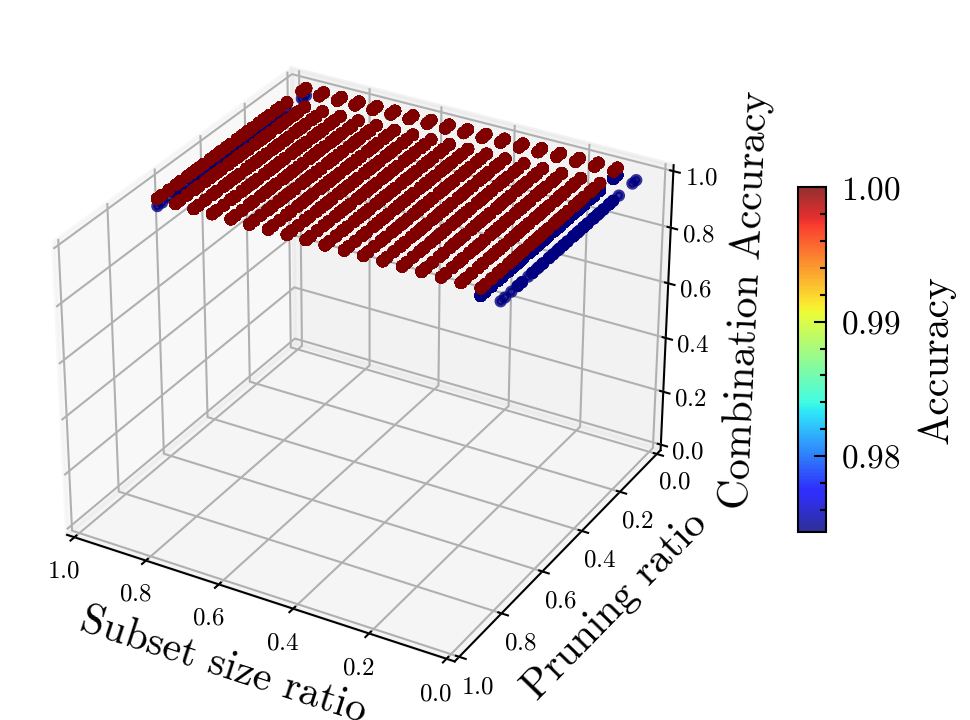

In [145]:
sorted_by_index = score_with_pruning_amounts.sort_index(ascending=False)
sorted_by_index['kind'] = pd.to_numeric(sorted_by_index['kind'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sctt = ax.scatter3D(sorted_by_index["kind"], sorted_by_index["amount"], sorted_by_index[METRIC],
                    alpha = 0.8,
                    s=15,
                    c = sorted_by_index[METRIC],
                    cmap = cm.jet,
                    marker ='.', rasterized=True)
fig.colorbar(sctt, label=METRIC.capitalize(), ax = ax, shrink = 0.5, aspect = 12, pad=0.09, location="right")
ax.tick_params(axis='both', which='major', labelsize=6, pad=-4)
ax.set_facecolor("white")
ax.view_init(30, -60, 0)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_zlim(0, 1)
ax.invert_yaxis()
ax.tick_params(axis="y", which="minor", left=False, right=False)
ax.invert_xaxis()
ax.minorticks_off()
ax.set_ylabel('Pruning ratio', labelpad=-9.2)
ax.set_xlabel('Subset size ratio', labelpad=-9.2)
ax.set_zlabel(f'Combination Accuracy', labelpad=-9.2)
fig.tight_layout()
fig.savefig(f"{FEATURE_SUBSETS_DIRECTORY}/3d_2_{METRIC}_{PRUNING_ALGORITHM}.pdf")